- Load Data (pandas, numpy, etc.)
- Data Visualization (matplotlib, seaborn, plotly, etc.)
- Data Imputation (Simple imputation, KNN imputation, etc.) (if data is <5% missing values then we can drop the missing values, otherwise we need to impute them)
- Outlier Analysis (box plots, z-score, IQR method, etc.)
- Gathering Insights (correlation analysis, feature importance, etc.)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('metro_countries_cities.csv')

In [3]:
data.columns

Index(['city', 'country', 'name', 'year', 'year_last_expansion', 'stations',
       'length_km', 'annual_ridership_mill', 'region'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   city                   198 non-null    object 
 1   country                198 non-null    object 
 2   name                   198 non-null    object 
 3   year                   198 non-null    int64  
 4   year_last_expansion    198 non-null    int64  
 5   stations               198 non-null    int64  
 6   length_km              198 non-null    int64  
 7   annual_ridership_mill  198 non-null    float64
 8   region                 198 non-null    object 
dtypes: float64(1), int64(4), object(4)
memory usage: 14.0+ KB


In [5]:
data.shape

(198, 9)

In [6]:
data.ndim

2

In [7]:
data.head()

,city,country,name,year,year_last_expansion,stations,length_km,annual_ridership_mill,region
0,Algiers,Algeria,Algiers Metro,2011,2018,19,185,45.30,africa
1,Buenos Aires,Argentina,Buenos Aires Underground,1913,2019,90,567,74.00,latin_america
2,Yerevan,Armenia,Yerevan Metro,1981,1996,10,134,10.75,asia
3,Sydney,Australia,Sydney Metro,2019,2019,13,36,12.90,australia
4,Vienna,Austria,Vienna U-Bahn,1976,2017,98,833,459.80,europe


In [ ]:
data.describe() # it always gives us the statistical summary of the data, it is very useful to understand the distribution of the data and to identify any outliers in the data. It also gives us the count, mean, std, min, 25%, 50%, 75% and max values of the numerical columns in the data.

,year,year_last_expansion,stations,length_km,annual_ridership_mill
count,198.000000,198.000000,198.000000,198.000000,198.000000
mean,1987.858586,2014.565657,68.939394,1506.595960,263.254980
std,31.617161,13.167921,76.200753,4900.037419,482.654133
min,1890.000000,1896.000000,6.000000,12.000000,0.000000
25%,1976.000000,2014.000000,21.000000,175.000000,24.025000
50%,1995.500000,2019.000000,41.000000,392.000000,92.950000
75%,2012.750000,2021.000000,90.750000,1001.250000,247.925000
max,2022.000000,2022.000000,424.000000,49039.000000,2834.690000


In [9]:
print(len(data.region.unique()))# give length of unique values of the region column
print(data.region.unique())# give unique values of the region column


6
['africa' 'latin_america' 'asia' 'australia' 'europe' 'north_america']


In [11]:
print(len(data.country.unique()))# give length of unique values of the country column
print(data.country.unique())# give unique values of the country column

59
['Algeria' 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan'
 'Belarus' 'Belgium' 'Brazil' 'Bulgaria' 'Canada' 'Chile' 'China'
 'Colombia' 'Czech Republic' 'Denmark' 'Dominican Republic' 'Egypt'
 'Finland' 'France' 'Georgia' 'Germany' 'Greece' 'Hungary' 'India'
 'Indonesia' 'Iran' 'Italy' 'Japan' 'Kazakhstan' 'North Korea'
 'South Korea' 'Malaysia' 'Mexico' 'Netherlands' 'Norway' 'Pakistan'
 'Panama' 'Peru' 'Philippines' 'Poland' 'Portugal' 'Qatar' 'Romania'
 'Russia' 'Singapore' 'Spain' 'Sweden' 'Switzerland' 'Taiwan' 'Thailand'
 'Turkey' 'Ukraine' 'United Arab Emirates' 'United Kingdom'
 'United States' 'Uzbekistan' 'Venezuela' 'Vietnam']


In [12]:
print(len(data.city.unique()))# give length of unique values of the city column
print(data.city.unique())# give unique values of the city column

187
['Algiers' 'Buenos Aires' 'Yerevan' 'Sydney' 'Vienna' 'Baku' 'Minsk'
 'Brussels' 'Belo Horizonte' 'Brasília' 'Porto Alegre' 'Recife'
 'Rio de Janeiro' 'Salvador' 'São Paulo' 'Sofia' 'Montreal' 'Toronto'
 'Vancouver' 'Santiago' 'Beijing' 'Changchun' 'Changsha' 'Changzhou'
 'Chengdu' 'Chongqing' 'Dalian' 'Dongguan' 'Foshan' 'Fuzhou' 'Guangzhou'
 'Guiyang' 'Hangzhou' 'Harbin' 'Hefei' 'Hohhot' 'Hong Kong' 'Jinan'
 'Kunming' 'Lanzhou' 'Luoyang' 'Nanchang' 'Nanjing' 'Nanning' 'Ningbo'
 'Qingdao' 'Shanghai' 'Shaoxing' 'Shenyang' 'Shenzhen' 'Shijiazhuang'
 'Suzhou' 'Taiyuan' 'Tianjin' 'Ürümqi' 'Wenzhou' 'Wuhan' 'Wuhu' 'Wuxi'
 'Xiamen' "Xi'an" 'Xuzhou' 'Zhengzhou' 'Medellín' 'Prague' 'Copenhagen'
 'Santo Domingo' 'Cairo' 'Helsinki' 'Lille' 'Lyon' 'Marseille' 'Paris'
 'Rennes' 'Toulouse' 'Tbilisi' 'Berlin' 'Hamburg' 'Munich' 'Nuremberg'
 'Athens' 'Budapest' 'Ahmedabad' 'Bengaluru' 'Chennai' 'Delhi' 'Gurgaon'
 'Hyderabad' 'Jaipur' 'Kanpur' 'Kochi' 'Kolkata' 'Lucknow' 'Mumbai'
 'Nagpur' 'Noida

C:\Users\SONU\AppData\Local\Temp\ipykernel_20172\2695641977.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['year'], bins=5)


<Axes: xlabel='year', ylabel='Density'>

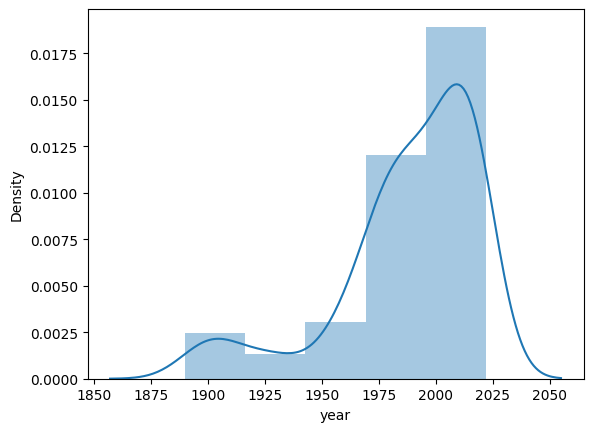

In [16]:
# Distribution plots of each parameter
sns.distplot(data['year'], bins=5)

C:\Users\SONU\AppData\Local\Temp\ipykernel_20172\1837918855.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['stations'], bins=5)


<Axes: xlabel='stations', ylabel='Density'>

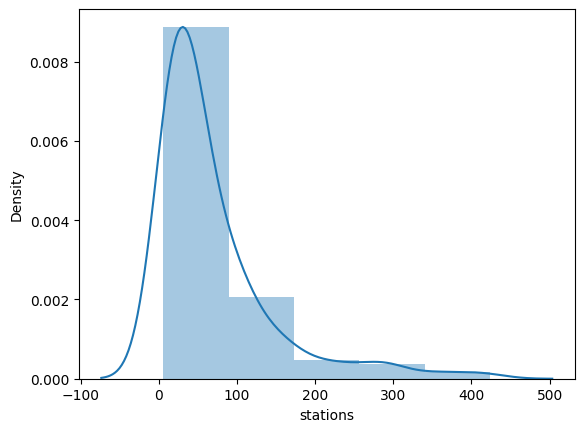

In [17]:
sns.distplot(data['stations'], bins=5)

C:\Users\SONU\AppData\Local\Temp\ipykernel_20172\85052624.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['annual_ridership_mill'], bins=5)


<Axes: xlabel='annual_ridership_mill', ylabel='Density'>

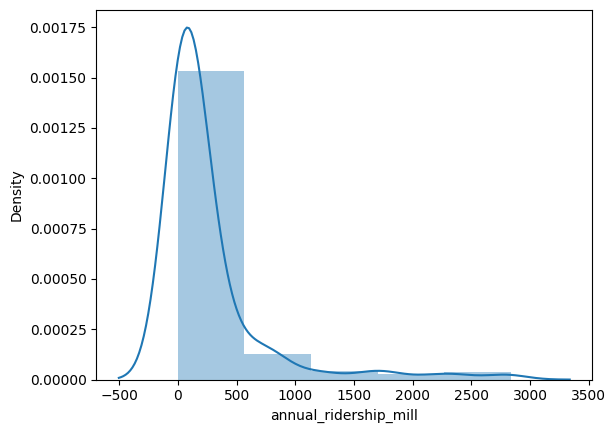

In [18]:
sns.distplot(data['annual_ridership_mill'], bins=5)

C:\Users\SONU\AppData\Local\Temp\ipykernel_20172\226636629.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['year_last_expansion'], bins=5)


<Axes: xlabel='year_last_expansion', ylabel='Density'>

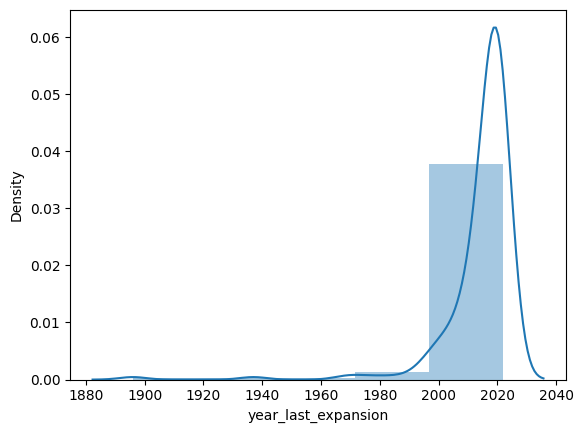

In [19]:
sns.distplot(data['year_last_expansion'], bins=5)

C:\Users\SONU\AppData\Local\Temp\ipykernel_20172\2366079392.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['length_km'], bins=5)


<Axes: xlabel='length_km', ylabel='Density'>

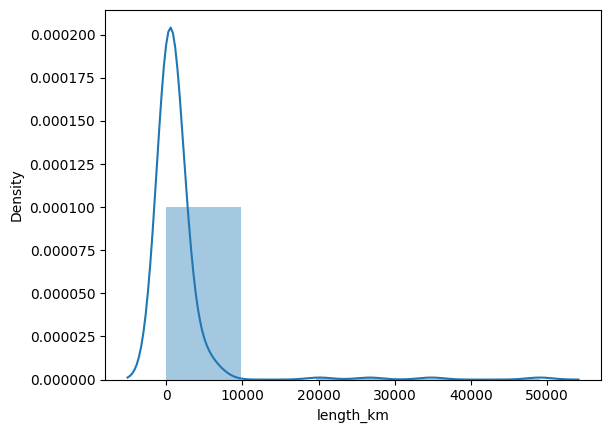

In [20]:
sns.distplot(data['length_km'], bins=5)

# Outlier Analysis with box plots

<Axes: ylabel='year'>

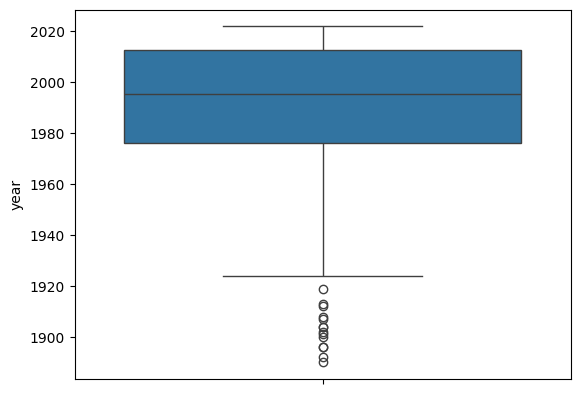

In [21]:
sns.boxplot(data['year'])

In [22]:
data_early_year = data.loc[(data['year'] < 1925)]
data_early_year

,city,country,name,year,year_last_expansion,stations,length_km,annual_ridership_mill,region
1,Buenos Aires,Argentina,Buenos Aires Underground,1913,2019,90,567,74.00,latin_america
72,Paris,France,Paris Métro,1900,2022,306,2251,753.00,europe
76,Berlin,Germany,Berlin U-Bahn,1902,2021,175,1478,596.00,europe
77,Hamburg,Germany,Hamburg U-Bahn,1912,2019,93,1058,249.50,europe
80,Athens,Greece,Athens Metro,1904,2020,64,887,259.20,europe
81,Budapest,Hungary,Budapest Metro,1896,2014,48,382,232.80,europe
157,Barcelona,Spain,Barcelona Metro,1924,2021,166,1472,217.93,europe
159,Madrid,Spain,Madrid Metro,1919,2019,242,2885,349.80,europe
177,Glasgow,United Kingdom,Glasgow Subway,1896,1896,15,104,12.70,europe
178,London,United Kingdom,London Underground,1890,2021,272,4052,296.00,europe


<Axes: xlabel='stations', ylabel='city'>

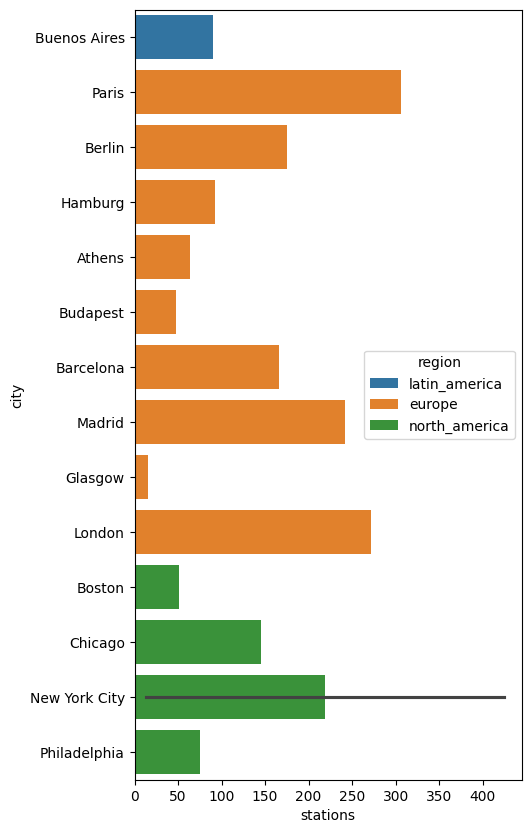

In [24]:
plt.figure(figsize=(5,10))
sns.barplot(x='stations', y='city', hue='region', data=data_early_year)

<Axes: xlabel='length_km', ylabel='city'>

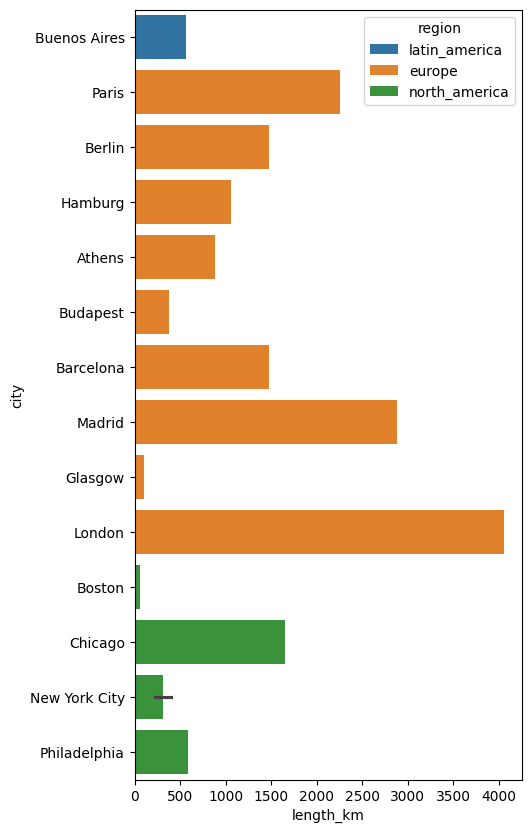

In [25]:
plt.figure(figsize=(5,10))
sns.barplot(x='length_km', y='city', hue='region', data=data_early_year)

<Axes: xlabel='annual_ridership_mill', ylabel='city'>

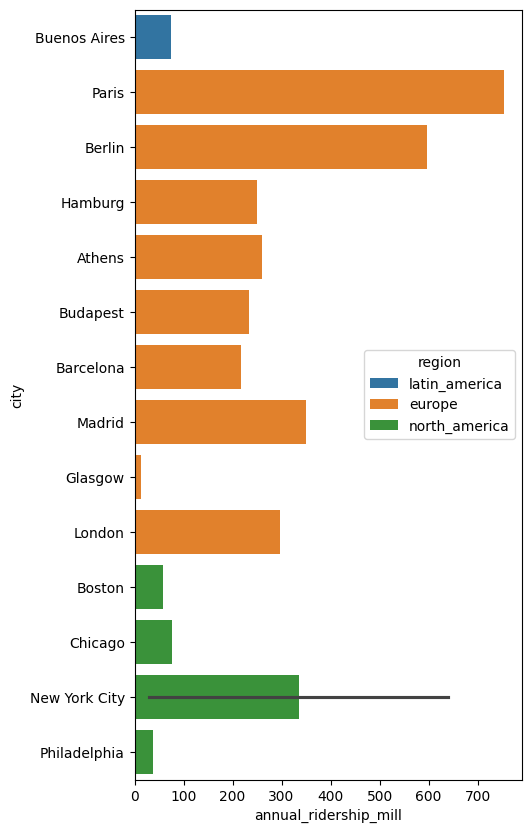

In [26]:
plt.figure(figsize=(5,10))
sns.barplot(x='annual_ridership_mill', y='city', hue='region', data=data_early_year)

<Axes: xlabel='stations', ylabel='Count'>

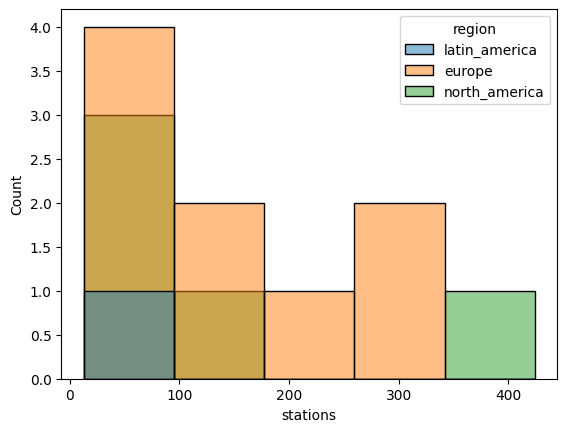

In [27]:
sns.histplot(x='stations', hue='region', data=data_early_year)

<Axes: xlabel='length_km', ylabel='Count'>

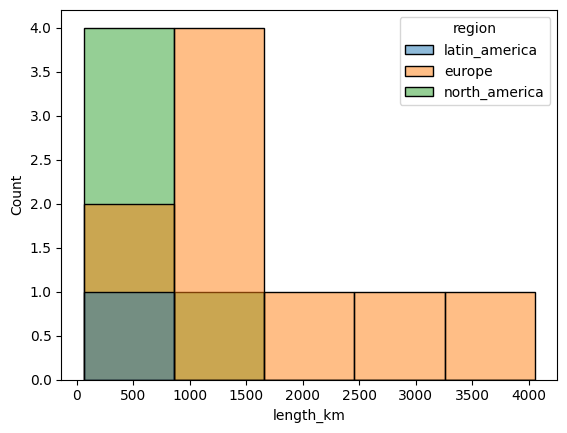

In [30]:
sns.histplot(x='length_km', hue='region', data=data_early_year)

<Axes: xlabel='annual_ridership_mill', ylabel='Count'>

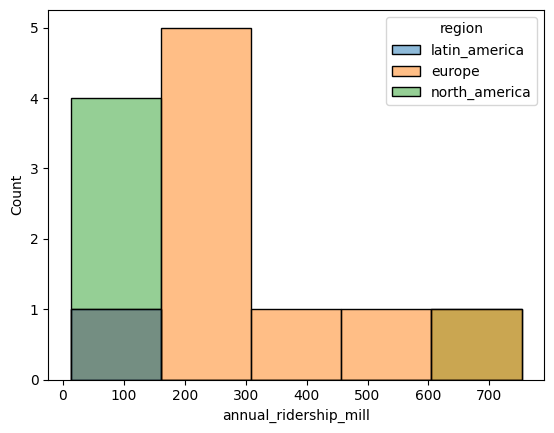

In [31]:
sns.histplot(x='annual_ridership_mill', hue='region', data=data_early_year)

(1900.0, 2020.0)

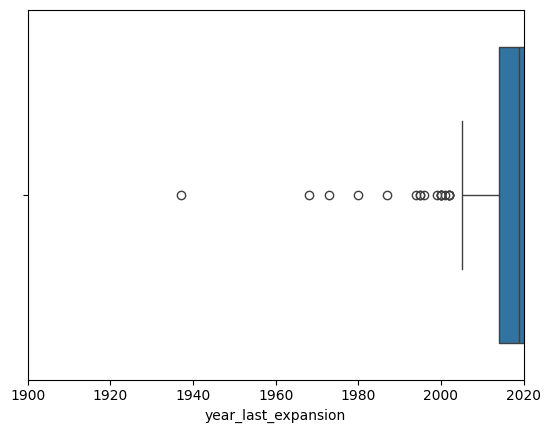

In [39]:
sns.boxplot(x='year_last_expansion', data=data)
plt.xlim(1900, 2020)

In [40]:
data_expansion_early = data.loc[(data['year_last_expansion'] < 2000)]
data_expansion_early

,city,country,name,year,year_last_expansion,stations,length_km,annual_ridership_mill,region
2,Yerevan,Armenia,Yerevan Metro,1981,1996,10,134,10.75,asia
116,Sapporo,Japan,Sapporo Municipal Subway,1971,1999,46,480,226.90,asia
124,Pyongyang,North Korea,Pyongyang Metro,1973,1987,17,225,36.00,asia
160,Stockholm,Sweden,Stockholm Metro,1950,1994,100,108,355.00,europe
173,Dnipro,Ukraine,Dnipro Metro,1995,1995,6,71,3.55,europe
177,Glasgow,United Kingdom,Glasgow Subway,1896,1896,15,104,12.70,europe
181,Baltimore,United States,Baltimore Metro SubwayLink,1983,1995,14,249,2.90,north_america
184,Cleveland,United States,RTA Rapid Transit: Red Line,1955,1968,18,31,2.60,north_america
189,New York City,United States,PATH,1908,1937,13,222,29.70,north_america
190,Philadelphia,United States,SEPTA,1907,1973,75,591,37.70,north_america


<Axes: xlabel='annual_ridership_mill', ylabel='city'>

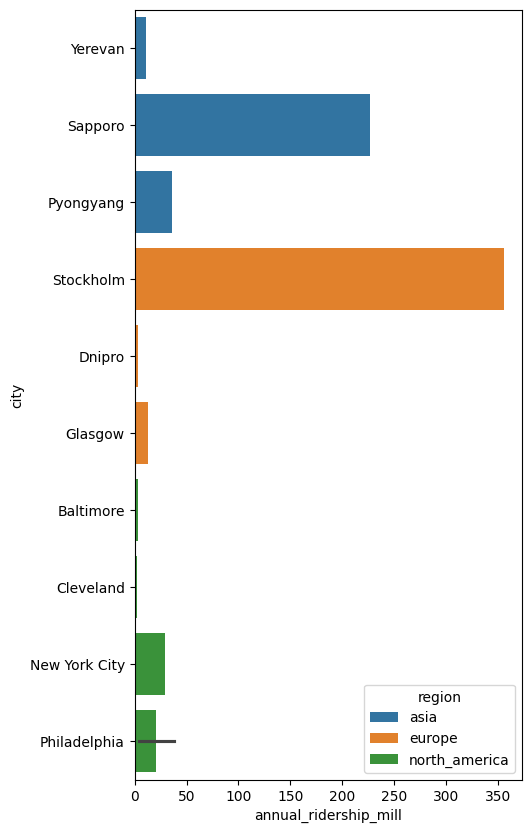

In [41]:
plt.figure(figsize=(5, 10))
sns.barplot(x='annual_ridership_mill', y='city', hue='region', data=data_expansion_early)

<Axes: xlabel='stations', ylabel='city'>

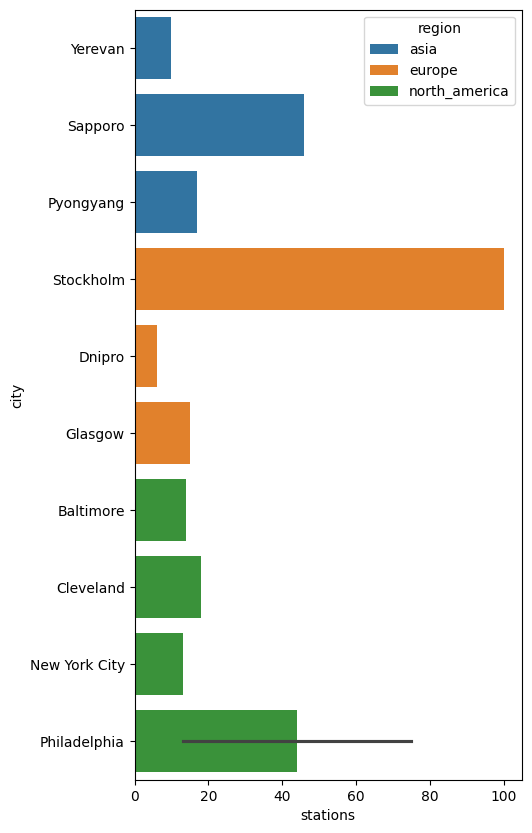

In [43]:
plt.figure(figsize=(5, 10))
sns.barplot(x='stations', y='city', hue='region', data=data_expansion_early)

<Axes: xlabel='length_km', ylabel='city'>

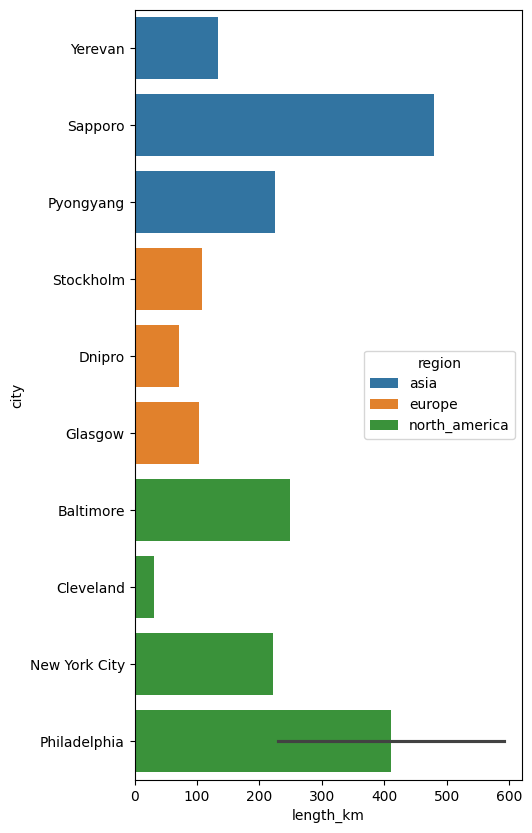

In [44]:
plt.figure(figsize=(5, 10))
sns.barplot(x='length_km', y='city', hue='region', data=data_expansion_early)

<Axes: xlabel='stations', ylabel='Count'>

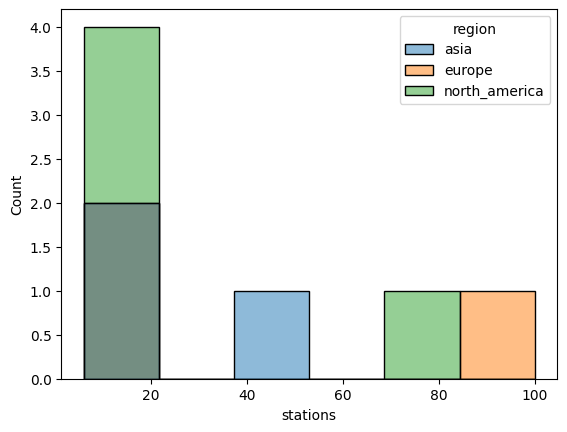

In [46]:
sns.histplot(x='stations', hue='region', data=data_expansion_early)

(0.0, 4000.0)

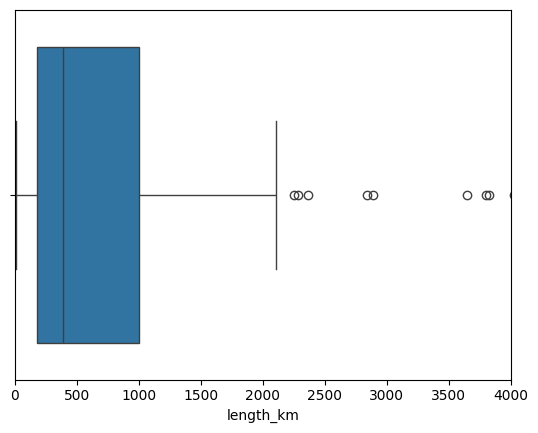

In [47]:
sns.boxplot(x='length_km', data=data)
plt.xlim(0, 4000)

In [48]:
data_lengthkm_out = data.loc[(data['length_km'] > 2300)]
data_lengthkm_out

,city,country,name,year,year_last_expansion,stations,length_km,annual_ridership_mill,region
5,Baku,Azerbaijan,Baku Metro,1967,2021,26,3803,72.100,asia
23,Changzhou,China,Changzhou Metro,2019,2021,43,5421,22.820,asia
24,Chengdu,China,Chengdu Metro,2010,2020,285,5192,1800.000,asia
25,Chongqing,China,Chongqing Rail Transit,2005,2022,210,4025,839.750,asia
26,Dalian,China,Dalian Metro,2003,2021,80,20103,125.220,asia
29,Fuzhou,China,Fuzhou Metro,2016,2020,46,5972,94.750,asia
30,Guangzhou,China,Guangzhou Metro,1997,2021,290,5894,2415.600,asia
35,Hohhot,China,Hohhot Metro,2019,2020,44,49039,21.300,asia
45,Qingdao,China,Qingdao Metro,2015,2021,138,2843,139.090,asia
52,Taiyuan,China,Taiyuan Metro,2020,2020,23,2365,0.876,asia


<Axes: xlabel='annual_ridership_mill', ylabel='Count'>

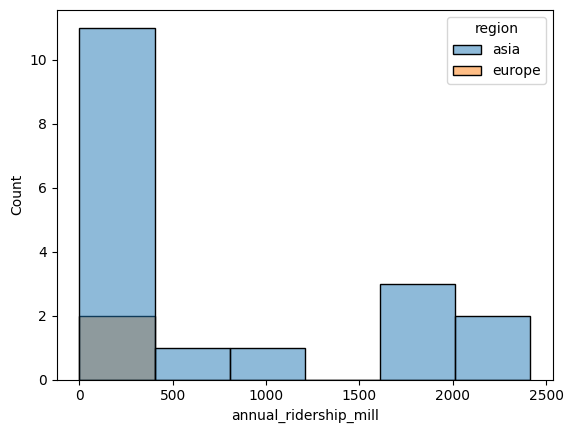

In [49]:
sns.histplot(x='annual_ridership_mill', hue='region', data=data_lengthkm_out)

<Axes: xlabel='stations', ylabel='Count'>

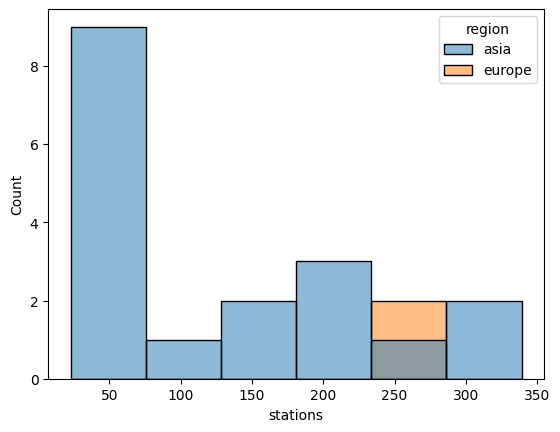

In [50]:
sns.histplot(x='stations', hue='region', data=data_lengthkm_out)

<Axes: xlabel='length_km', ylabel='Count'>

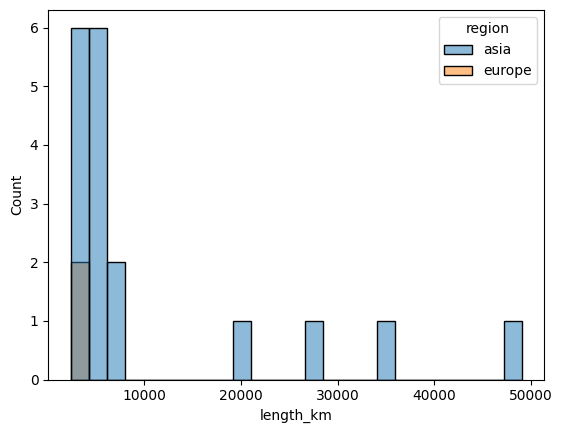

In [51]:
sns.histplot(x='length_km', hue='region', data=data_lengthkm_out)

<Axes: xlabel='length_km', ylabel='city'>

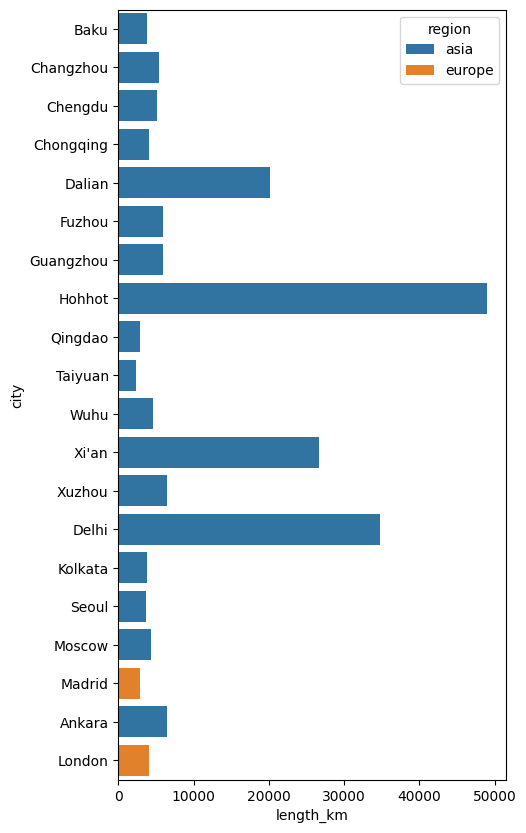

In [53]:
plt.figure(figsize=(5,10))
sns.barplot(x='length_km', y='city', hue='region', data=data_lengthkm_out)

<Axes: xlabel='annual_ridership_mill', ylabel='city'>

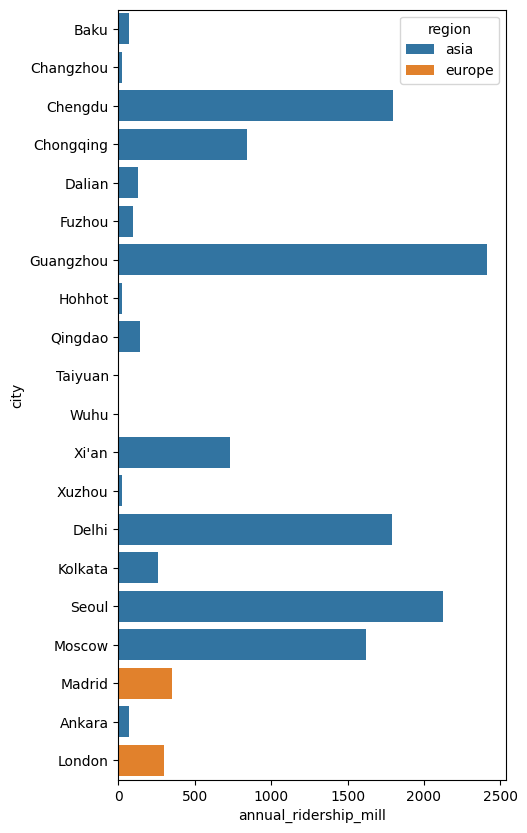

In [54]:
plt.figure(figsize=(5,10))
sns.barplot(x='annual_ridership_mill', y='city', hue='region', data=data_lengthkm_out)

<Axes: ylabel='stations'>

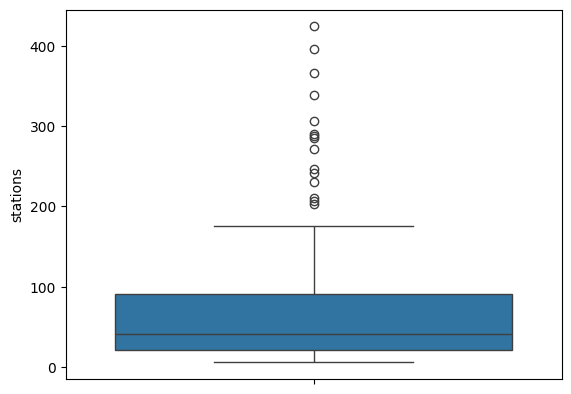

In [55]:
sns.boxplot(data['stations'])

In [56]:
data_stations_max = data.loc[(data['stations'] > 200)]
data_stations_max

,city,country,name,year,year_last_expansion,stations,length_km,annual_ridership_mill,region
20,Beijing,China,Beijing Subway,1971,2021,366,762,2292.65,asia
24,Chengdu,China,Chengdu Metro,2010,2020,285,5192,1800.00,asia
25,Chongqing,China,Chongqing Rail Transit,2005,2022,210,4025,839.75,asia
30,Guangzhou,China,Guangzhou Metro,1997,2021,290,5894,2415.60,asia
32,Hangzhou,China,Hangzhou Metro,2012,2022,207,401,582.41,asia
46,Shanghai,China,Shanghai Metro,1993,2021,396,803,2834.69,asia
49,Shenzhen,China,Shenzhen Metro,2004,2021,288,419,1626.73,asia
56,Wuhan,China,Wuhan Metro,2004,2021,247,435,628.03,asia
72,Paris,France,Paris Métro,1900,2022,306,2251,753.00,europe
85,Delhi,India,Delhi Metro,2002,2021,230,34812,1790.00,asia


<Axes: xlabel='length_km', ylabel='city'>

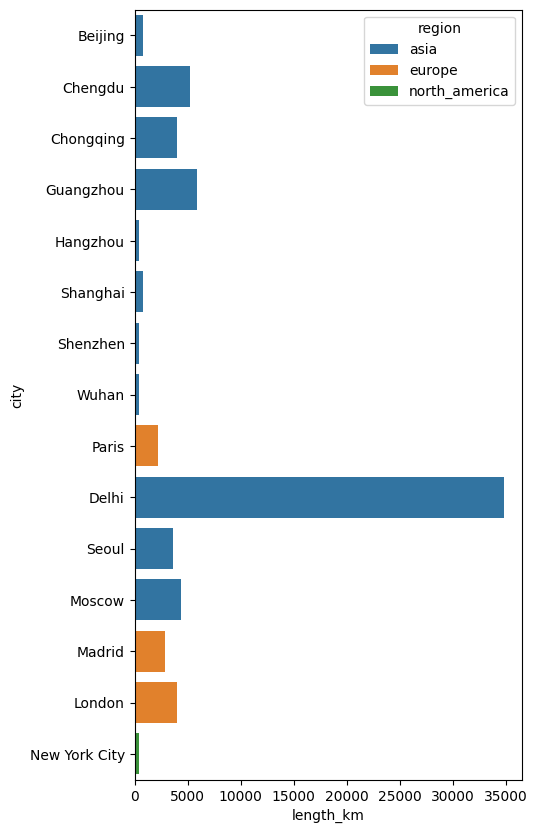

In [57]:
plt.figure(figsize=(5,10))
sns.barplot(x='length_km', y='city', hue='region', data=data_stations_max)

<Axes: xlabel='stations', ylabel='city'>

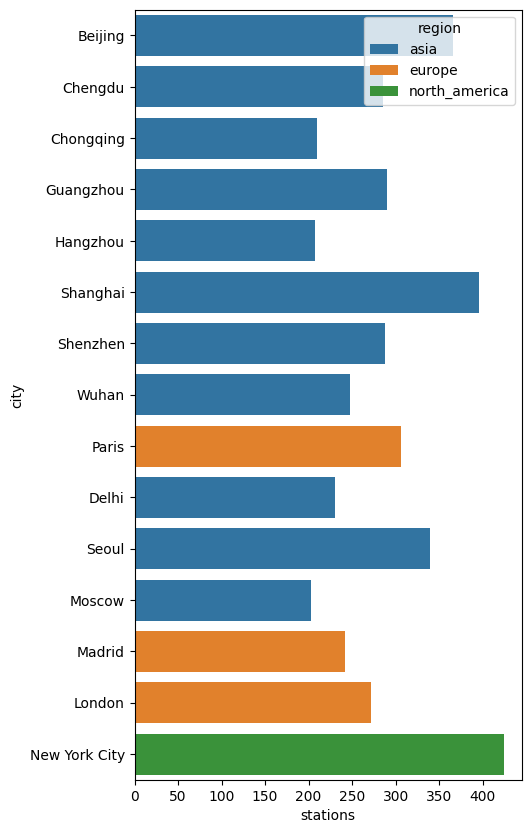

In [58]:
plt.figure(figsize=(5,10))
sns.barplot(x='stations', y='city', hue='region', data=data_stations_max)

<Axes: xlabel='annual_ridership_mill', ylabel='city'>

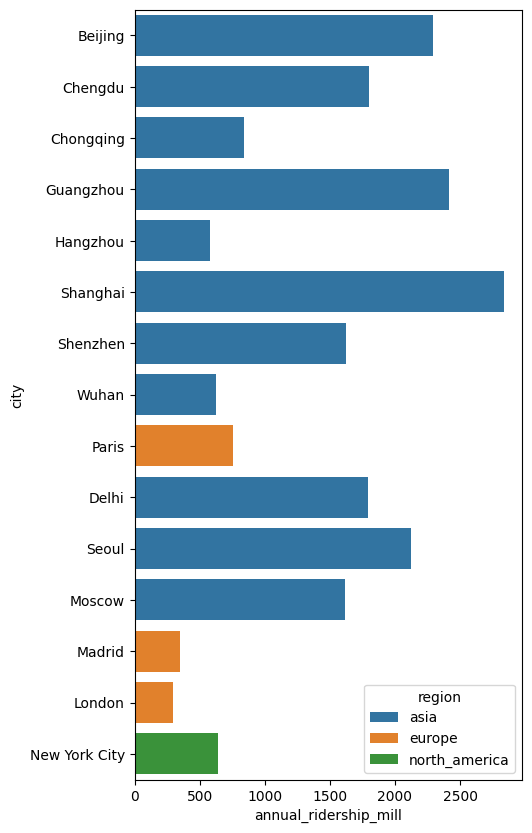

In [59]:
plt.figure(figsize=(5,10))
sns.barplot(x='annual_ridership_mill', y='city', hue='region', data=data_stations_max)

<Axes: xlabel='length_km', ylabel='Count'>

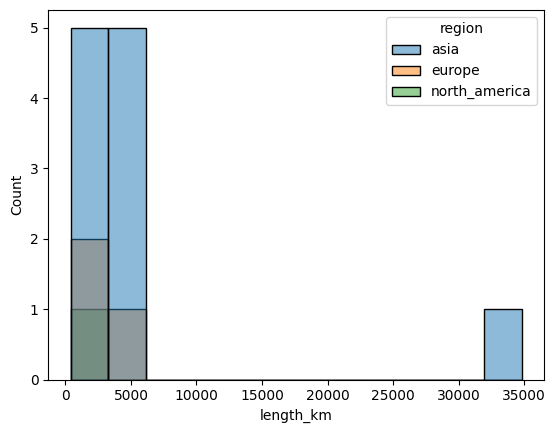

In [60]:
sns.histplot(x='length_km', hue='region', data=data_stations_max)

<Axes: xlabel='stations', ylabel='Count'>

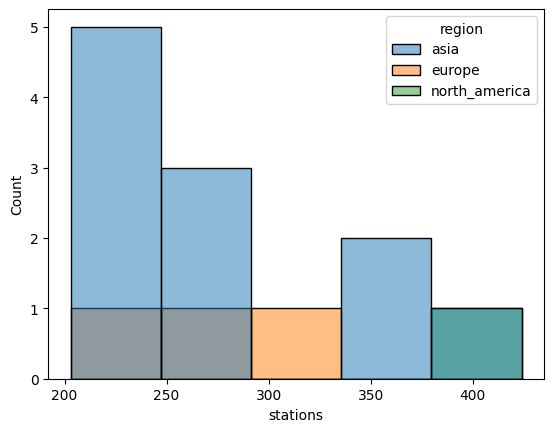

In [61]:
sns.histplot(x='stations', hue='region', data=data_stations_max)

<Axes: xlabel='annual_ridership_mill', ylabel='Count'>

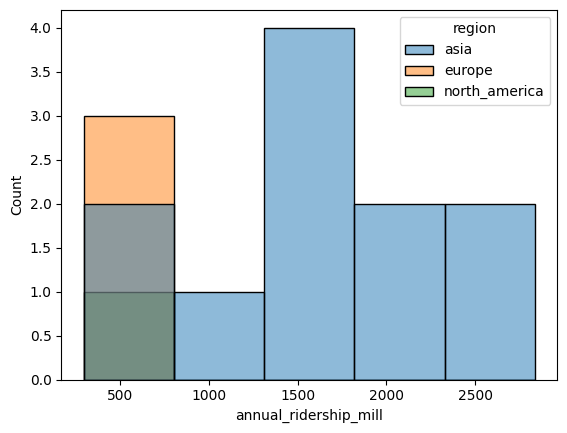

In [62]:
sns.histplot(x='annual_ridership_mill', hue='region', data=data_stations_max)

<Axes: ylabel='annual_ridership_mill'>

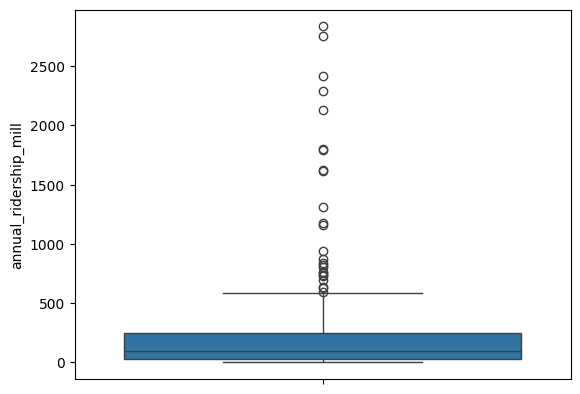

In [63]:
sns.boxplot(data['annual_ridership_mill'])

In [64]:
data_ridership_max = data.loc[(data['annual_ridership_mill'] > 600)]
data_ridership_max

,city,country,name,year,year_last_expansion,stations,length_km,annual_ridership_mill,region
14,São Paulo,Brazil,São Paulo Metro,1974,2021,91,1044,763.60,latin_america
20,Beijing,China,Beijing Subway,1971,2021,366,762,2292.65,asia
24,Chengdu,China,Chengdu Metro,2010,2020,285,5192,1800.00,asia
25,Chongqing,China,Chongqing Rail Transit,2005,2022,210,4025,839.75,asia
30,Guangzhou,China,Guangzhou Metro,1997,2021,290,5894,2415.60,asia
36,Hong Kong,China,Mass Transit Railway,1979,2021,97,2044,1155.80,asia
42,Nanjing,China,Nanjing Metro,2005,2021,175,427,801.34,asia
46,Shanghai,China,Shanghai Metro,1993,2021,396,803,2834.69,asia
49,Shenzhen,China,Shenzhen Metro,2004,2021,288,419,1626.73,asia
56,Wuhan,China,Wuhan Metro,2004,2021,247,435,628.03,asia


<Axes: xlabel='annual_ridership_mill', ylabel='city'>

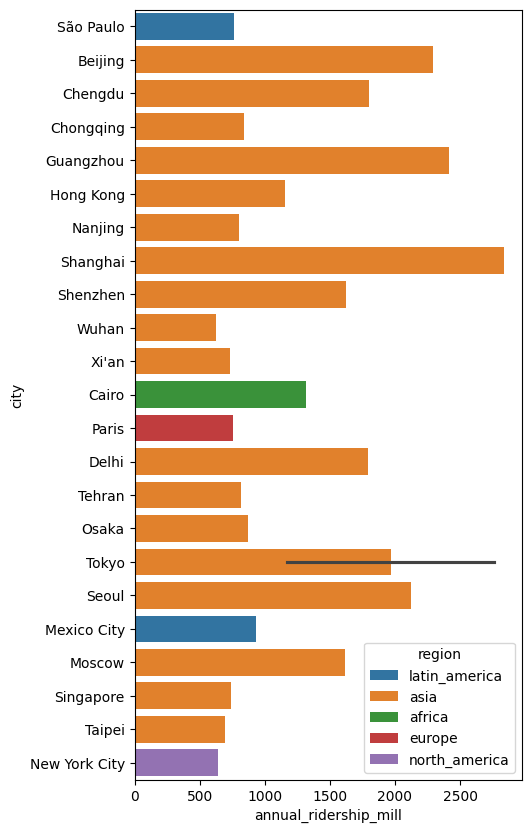

In [65]:
plt.figure(figsize=(5,10))
sns.barplot(x='annual_ridership_mill', y='city', hue='region', data=data_ridership_max)

<Axes: xlabel='stations', ylabel='city'>

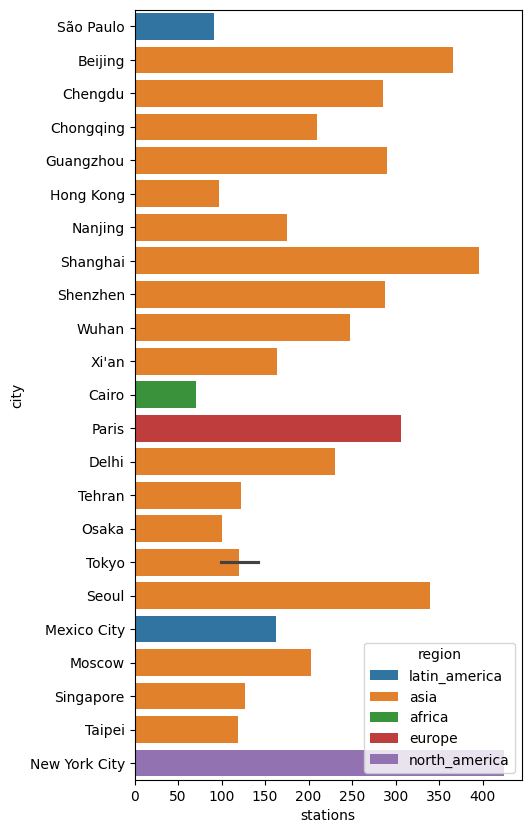

In [66]:
plt.figure(figsize=(5,10))
sns.barplot(x='stations', y='city', hue='region', data=data_ridership_max)

<Axes: xlabel='length_km', ylabel='city'>

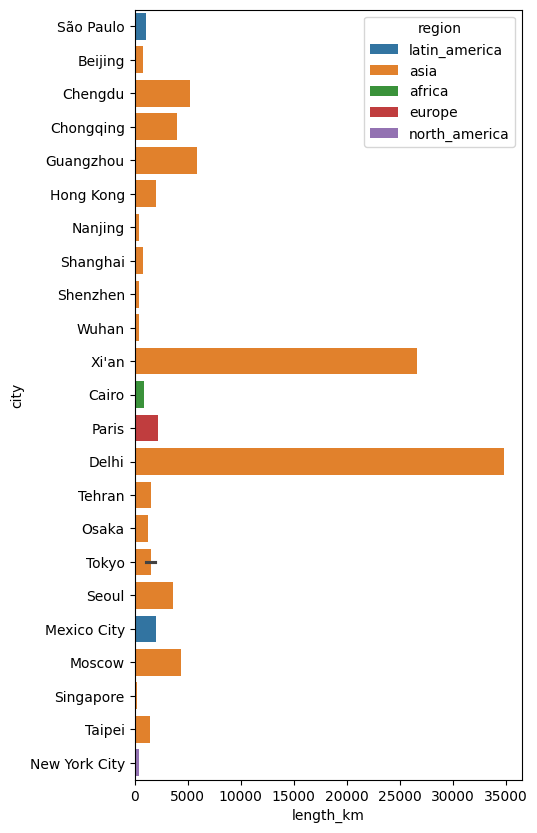

In [67]:
plt.figure(figsize=(5,10))
sns.barplot(x='length_km', y='city', hue='region', data=data_ridership_max)

<Axes: xlabel='annual_ridership_mill', ylabel='Count'>

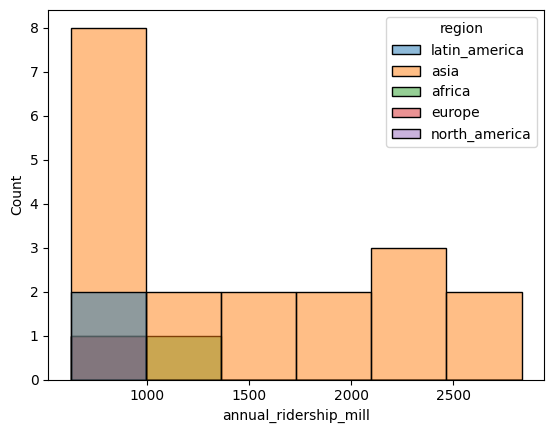

In [68]:
sns.histplot(x='annual_ridership_mill', hue='region', data=data_ridership_max)

<Axes: xlabel='length_km', ylabel='Count'>

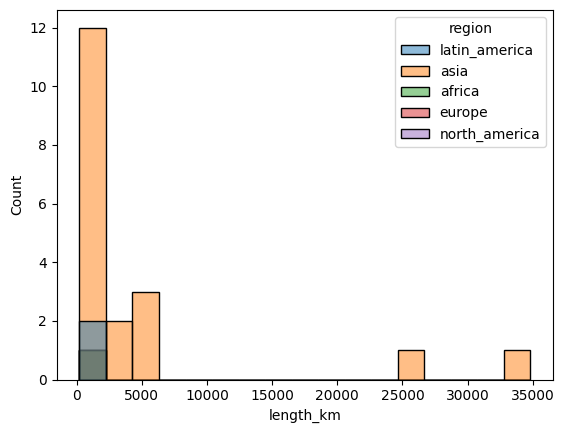

In [69]:
sns.histplot(x='length_km', hue='region', data=data_ridership_max)

# Handling outliers

In [73]:
numeric_data = data.select_dtypes(include='number')

In [74]:
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

year                      36.75
year_last_expansion        7.00
stations                  69.75
length_km                826.25
annual_ridership_mill    223.90
dtype: float64


In [75]:
data = data[~((numeric_data < (Q1 - 1.5 * IQR)) | 
              (numeric_data > (Q3 + 1.5 * IQR))).any(axis=1)]


# Data Imputation

In [ ]:
data.isna().sum()
# to handle null values we can use fillna() method to fill the null values with mean, median or mode of the column. We can also use dropna() method to drop the rows with null values.

city                     0
country                  0
name                     0
year                     0
year_last_expansion      0
stations                 0
length_km                0
annual_ridership_mill    0
region                   0
dtype: int64

# Relationship between columns

In [77]:
data.head()

,city,country,name,year,year_last_expansion,stations,length_km,annual_ridership_mill,region
0,Algiers,Algeria,Algiers Metro,2011,2018,19,185,45.3,africa
3,Sydney,Australia,Sydney Metro,2019,2019,13,36,12.9,australia
4,Vienna,Austria,Vienna U-Bahn,1976,2017,98,833,459.8,europe
6,Minsk,Belarus,Minsk Metro,1984,2020,33,408,219.3,europe
7,Brussels,Belgium,Brussels Metro,1976,2009,59,399,87.6,europe


<Axes: xlabel='stations', ylabel='length_km'>

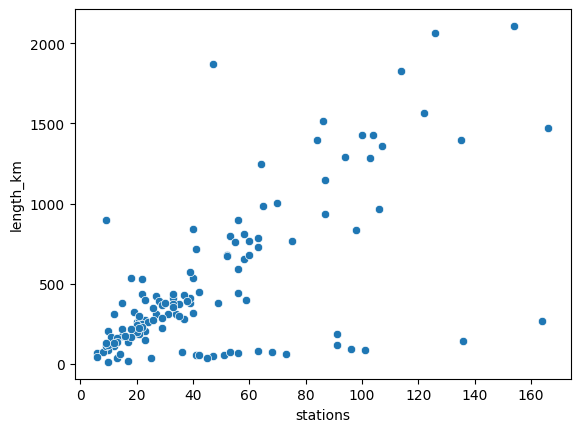

In [83]:
sns.scatterplot(x='stations', y='length_km', data=data)

<Axes: xlabel='stations', ylabel='annual_ridership_mill'>

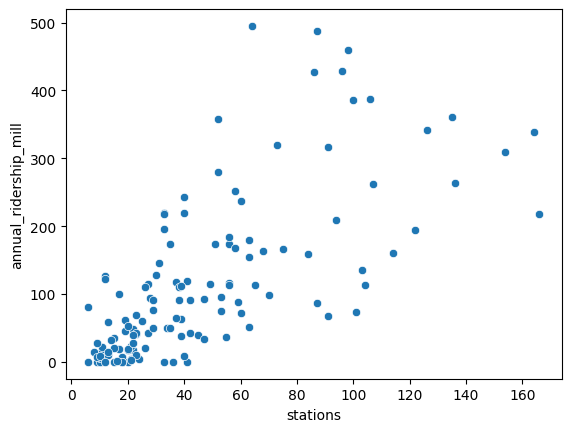

In [80]:
sns.scatterplot(x='stations', y='annual_ridership_mill', data=data)

(0.0, 10000.0)

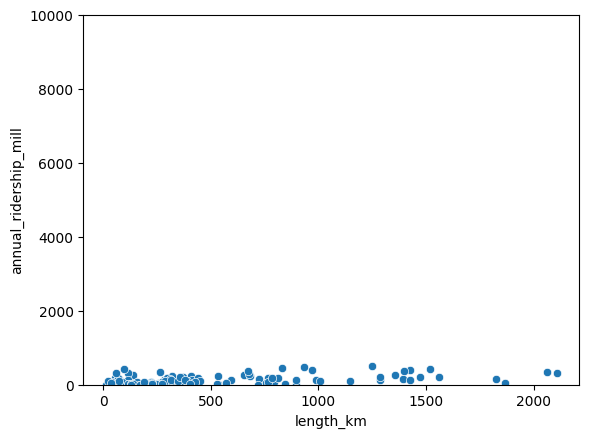

In [81]:
sns.scatterplot(x='length_km', y='annual_ridership_mill', data=data)
plt.ylim(0, 10000)

(2000.0, 2020.0)

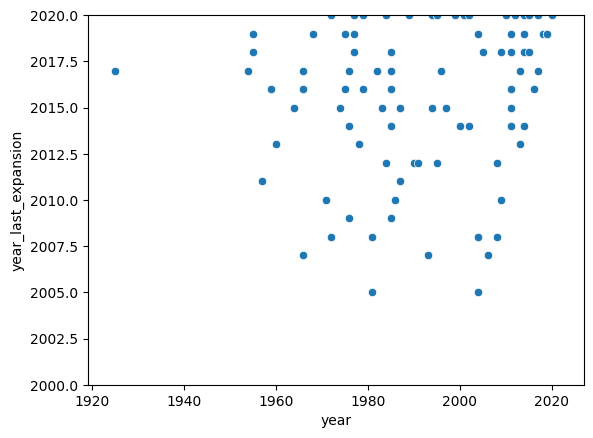

In [82]:
sns.scatterplot(x='year', y='year_last_expansion', data=data)
plt.ylim(2000, 2020)

<Axes: xlabel='year', ylabel='stations'>

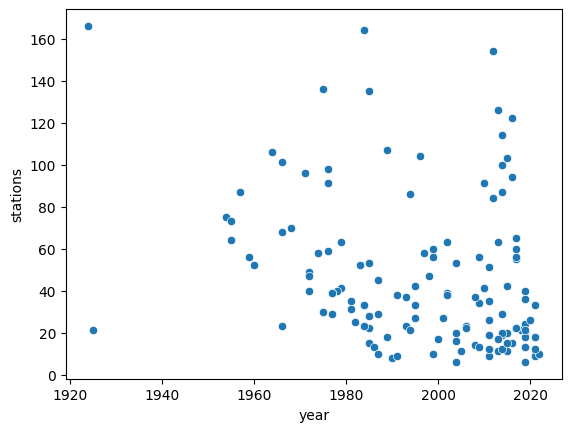

In [85]:
sns.scatterplot(x='year', y='stations', data=data)

(0.0, 10000.0)

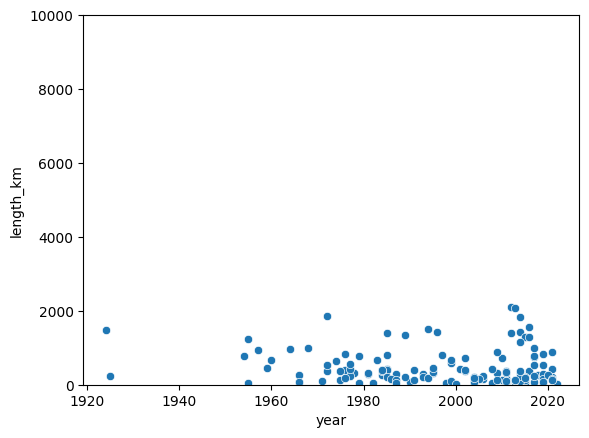

In [86]:
sns.scatterplot(x='year', y='length_km', data=data)
plt.ylim(0, 10000)

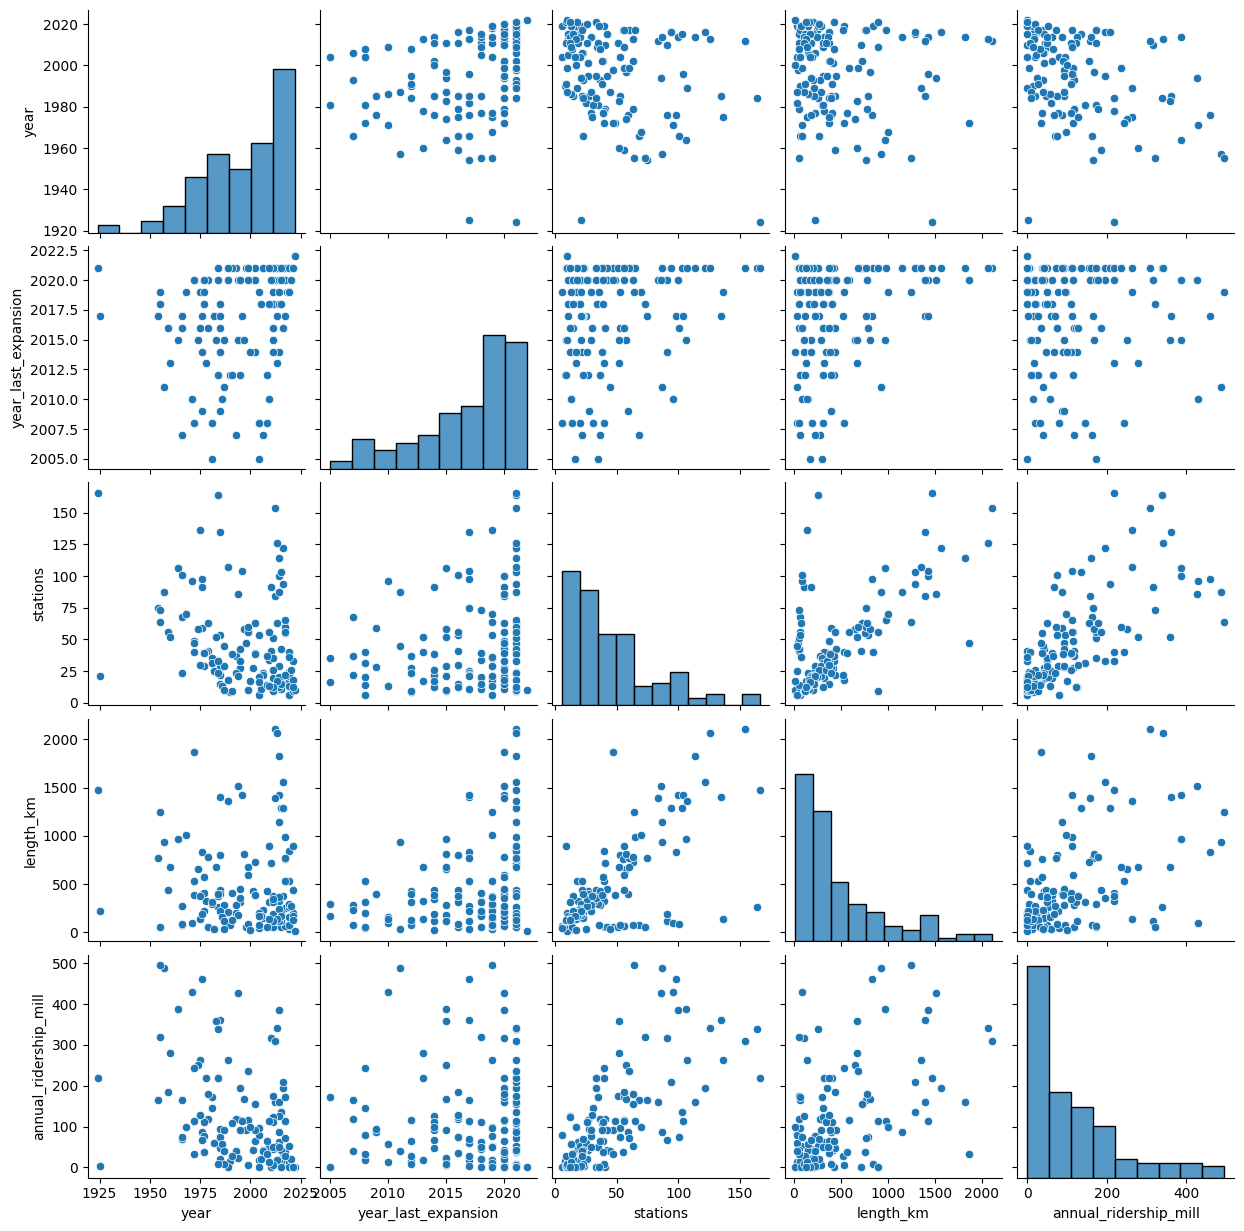

In [87]:
sns.pairplot(data=data)

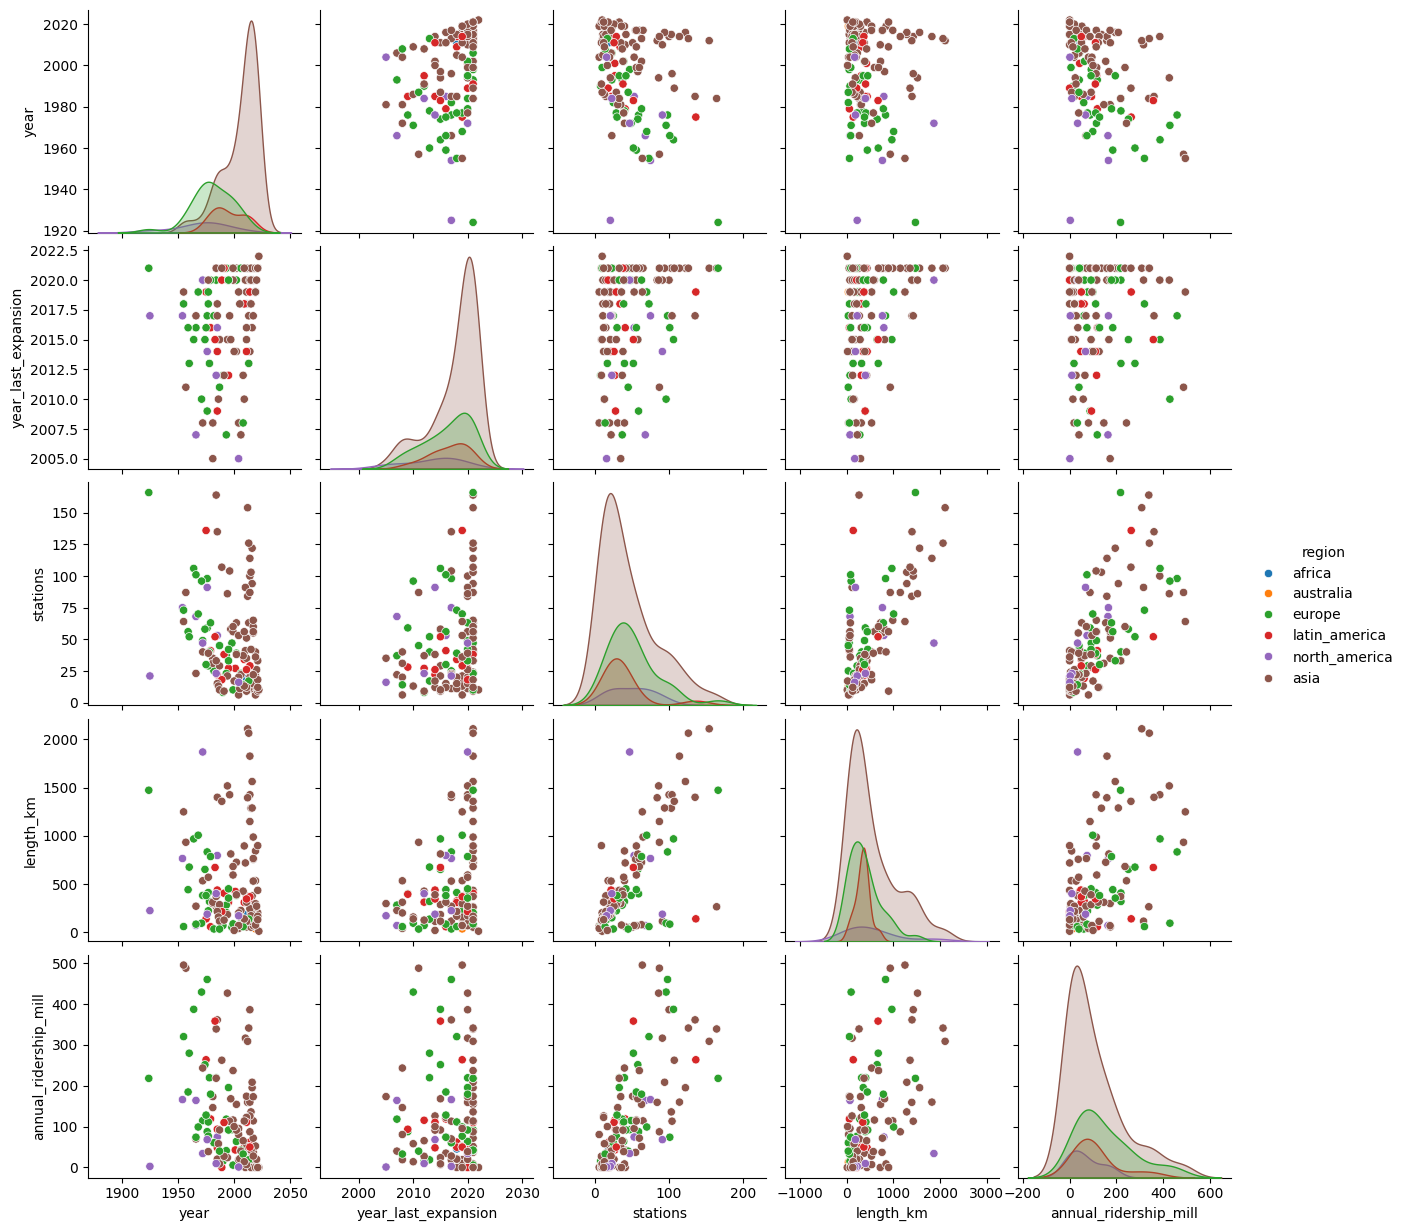

In [88]:
sns.pairplot(data=data, hue='region')

<Axes: xlabel='annual_ridership_mill', ylabel='stations'>

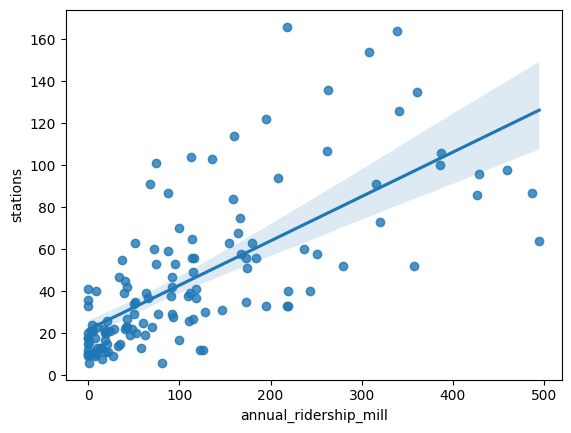

In [89]:
sns.regplot(x='annual_ridership_mill', y='stations', data=data)

<Axes: xlabel='annual_ridership_mill', ylabel='length_km'>

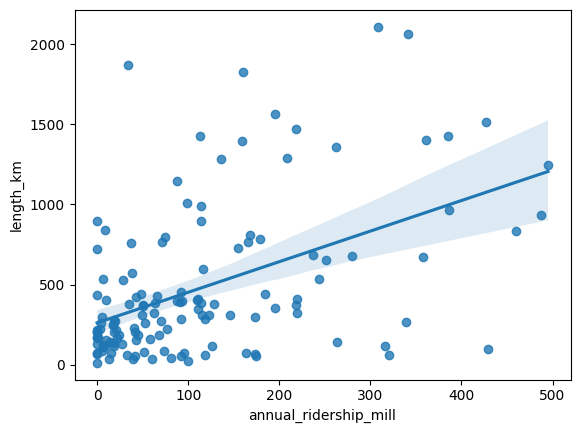

In [90]:
sns.regplot(x='annual_ridership_mill', y='length_km', data=data)

# Region wise analysis

In [91]:
data.region.unique()

array(['africa', 'australia', 'europe', 'latin_america', 'north_america',
       'asia'], dtype=object)

In [95]:
data_africa = data.loc[(data['region'] == 'africa')]
data_latin_america = data.loc[(data['region'] == 'latin_america')]
data_asia = data.loc[(data['region'] == 'asia')]
data_europe = data.loc[(data['region'] == 'europe')]
data_north_america = data.loc[(data['region'] == 'north_america')]
data_australia = data.loc[(data['region'] == 'australia')]

In [97]:
import plotly.express as px
fig = px.sunburst(
    data_africa,
    path=['region', 'city', 'name','stations'],
    values='annual_ridership_mill'
)
fig.show()


In [98]:
import plotly.express as px
fig = px.sunburst(
    data_latin_america,
    path=['region', 'city', 'name', 'stations'],
    values='annual_ridership_mill'
)
fig.show()

In [99]:
import plotly.express as px
fig = px.sunburst(
    data_asia,
    path=['region', 'city', 'name', 'stations'],
    values='annual_ridership_mill'
)
fig.show()

In [102]:
correlation= numeric_data .corr()
correlation

,year,year_last_expansion,stations,length_km,annual_ridership_mill
year,1.000000,0.371102,-0.303588,0.083004,-0.185124
year_last_expansion,0.371102,1.000000,0.213859,0.112577,0.148290
stations,-0.303588,0.213859,1.000000,0.194416,0.768383
length_km,0.083004,0.112577,0.194416,1.000000,0.194095
annual_ridership_mill,-0.185124,0.148290,0.768383,0.194095,1.000000


<Axes: >

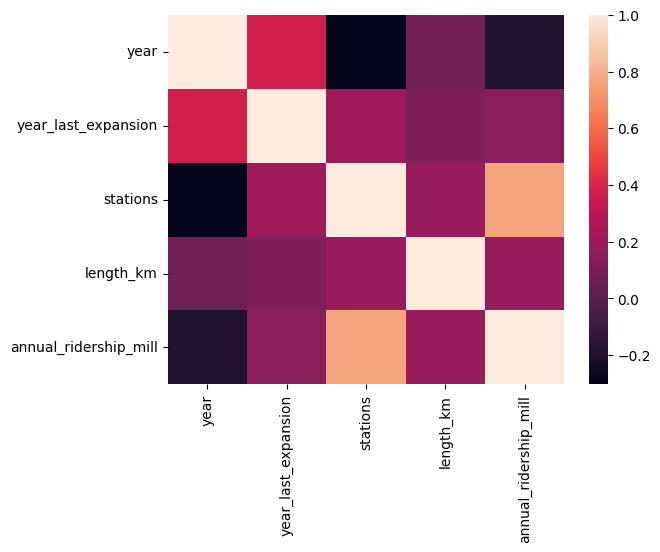

In [103]:
sns.heatmap(correlation)